In [1]:
## Import libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

## Build CNN

In [3]:
def build_cnn(input_shape = (224,224,3), num_classes=10):
    model = Sequential()
    model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 input_shape = input_shape,
                 activation = 'relu')) 
    model.add(MaxPool2D(pool_size = (2,2))) 

    model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 activation = 'relu')) 
    model.add(MaxPool2D(pool_size = (2,2))) 

    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    return model

In [4]:
model = build_cnn(input_shape = (64,64,3))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)               

## Create image data generator object

In [5]:
train_datagen= ImageDataGenerator(rescale = 1/255,
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1/255)

## Read Images

In [49]:
train = train_datagen.flow_from_directory('Datasets/imagenet-new/train/',
                                         target_size = (64, 64),
                                         class_mode = 'categorical',
                                         batch_size = 32)

test = train_datagen.flow_from_directory('Datasets/imagenet-new/test/',
                                         target_size = (64, 64),
                                         class_mode = 'categorical',
                                         batch_size = 1)

Found 5000 images belonging to 10 classes.
Found 10000 images belonging to 1 classes.


In [7]:
train.class_indices

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}

### Compile model

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

history = model.fit(train, epochs = 20)


Epoch 1/20


157/157 [==============================] - 13s 74ms/step - loss: 1.9497 - accuracy: 0.3030
Epoch 2/20
157/157 [==============================] - 6s 39ms/step - loss: 1.5987 - accuracy: 0.4438
Epoch 3/20
157/157 [==============================] - 6s 39ms/step - loss: 1.4248 - accuracy: 0.5126
Epoch 4/20
157/157 [==============================] - 6s 39ms/step - loss: 1.2876 - accuracy: 0.5648
Epoch 5/20
157/157 [==============================] - 6s 39ms/step - loss: 1.0959 - accuracy: 0.6334
Epoch 6/20
157/157 [==============================] - 6s 39ms/step - loss: 0.9482 - accuracy: 0.6876
Epoch 7/20
157/157 [==============================] - 6s 40ms/step - loss: 0.7931 - accuracy: 0.7402
Epoch 8/20
157/157 [==============================] - 6s 39ms/step - loss: 0.6603 - accuracy: 0.7870
Epoch 9/20
157/157 [==============================] - 6s 40ms/step - loss: 0.5076 - accuracy: 0.8456
Epoch 10/20
157/157 [==============================] - 6s 39ms/step - loss: 0.3858 - ac

### LABEL UNLABELED DATA

In [50]:
y_pred = model.predict(test)
y_pred

10000/10000 [==============================] - 35s 3ms/step


array([[6.31172443e-05, 6.95271738e-05, 3.06662470e-01, ...,
        5.22046760e-02, 6.01922274e-01, 1.00054036e-04],
       [9.39132236e-13, 9.24129913e-13, 9.94496167e-01, ...,
        6.41020306e-04, 4.45044227e-03, 2.94920035e-08],
       [2.60955896e-02, 5.60019864e-03, 1.12607064e-04, ...,
        2.49839090e-02, 2.30618593e-06, 4.81537310e-03],
       ...,
       [3.00471941e-13, 8.81123015e-07, 1.99634214e-05, ...,
        6.25352332e-05, 4.67383143e-06, 1.66527170e-04],
       [9.98797178e-01, 2.80699020e-10, 7.02340856e-07, ...,
        8.16117335e-06, 8.72286354e-10, 1.78686594e-06],
       [3.76237067e-03, 2.13940259e-12, 8.61211796e-11, ...,
        5.74712931e-06, 3.79364802e-16, 9.07555659e-06]], dtype=float32)

In [51]:
fish = pd.Series(test.filenames)[[np.argmax(i)==1 for i in y_pred]]
fish

8       images\test_1004.JPEG
25       images\test_102.JPEG
32      images\test_1026.JPEG
40      images\test_1033.JPEG
43      images\test_1036.JPEG
                ...          
9966    images\test_9969.JPEG
9975    images\test_9977.JPEG
9976    images\test_9978.JPEG
9985    images\test_9986.JPEG
9987    images\test_9988.JPEG
Length: 967, dtype: object

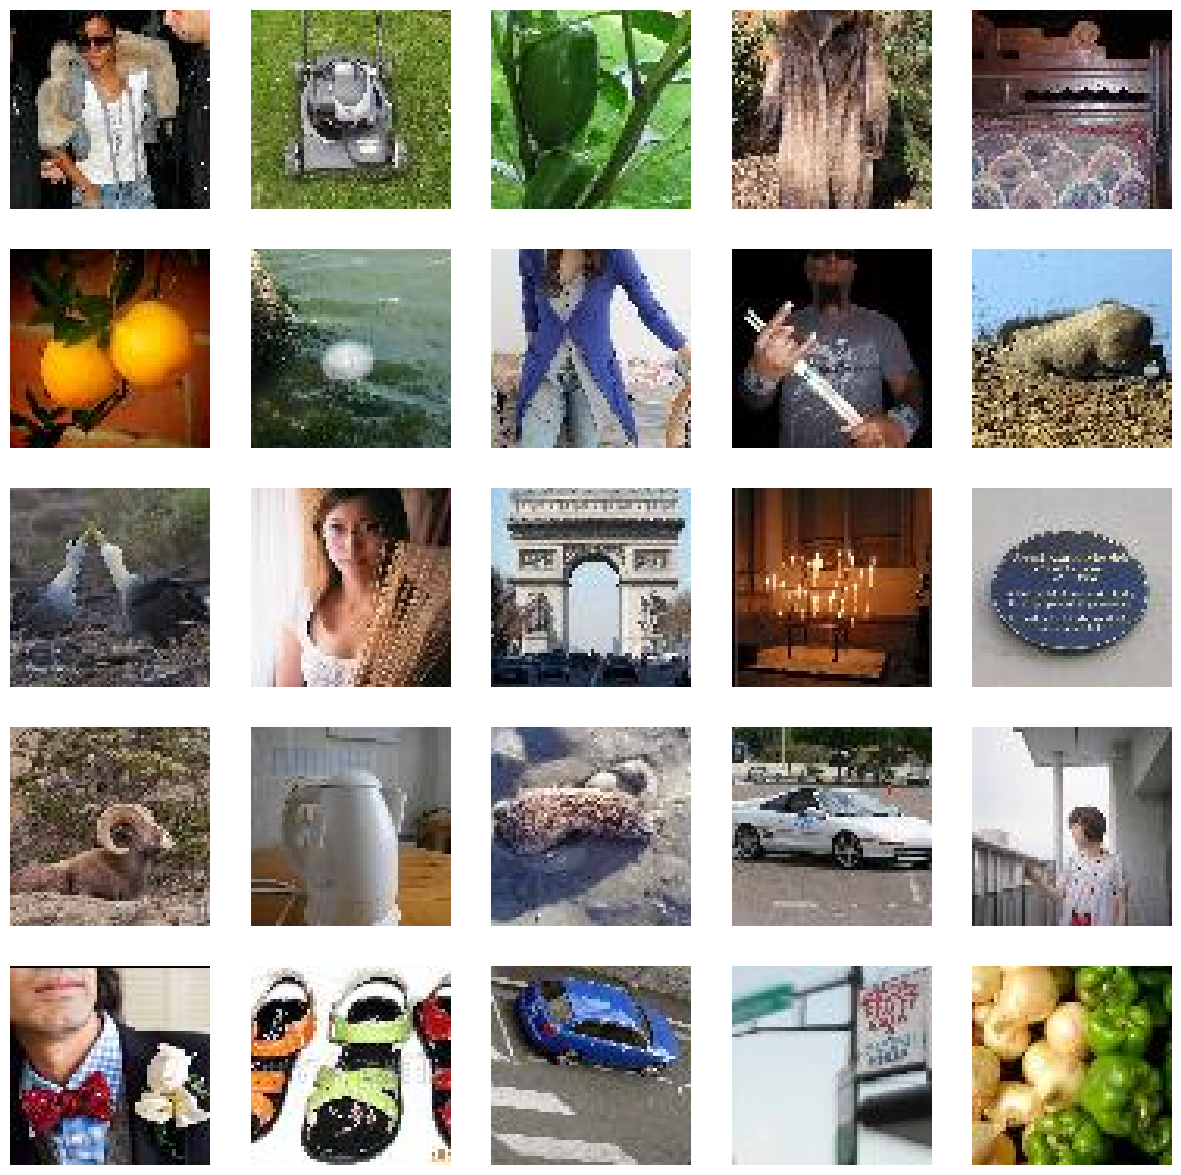

In [52]:
plt.figure(figsize = (15,15))
for i,fname in enumerate(fish.iloc[0:25]):
    img = plt.imread(test.directory+'/'+fname)
    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.axis('off')

In [53]:
import os
mypath = r'C:/Users/Administrator.DAI-PC2/Downloads\Shubham/08.5 Computer Vision/Datasets/imagenet-new/test/images/'

for file in os.listdir(mypath):
    image = plt.imread(mypath+file)
    if len(image.shape)==3:
        image = image.reshape(1,64,64,3)
        result = model.predict(image, verbose=0)
        if result.argmax()==1:
            print(file)

test_1.JPEG
test_1002.JPEG
test_1008.JPEG
test_1011.JPEG
test_1047.JPEG
test_1048.JPEG
test_1052.JPEG
test_1057.JPEG
test_107.JPEG
test_1071.JPEG
test_1076.JPEG
test_1081.JPEG
test_1092.JPEG
test_11.JPEG
test_1111.JPEG
test_1122.JPEG
test_1145.JPEG
test_1168.JPEG
test_1178.JPEG
test_1217.JPEG
test_1222.JPEG
test_1231.JPEG
test_1237.JPEG
test_1244.JPEG
test_1259.JPEG
test_126.JPEG
test_1265.JPEG
test_1266.JPEG
test_1268.JPEG
test_1273.JPEG
test_1300.JPEG
test_1309.JPEG
test_1313.JPEG
test_1314.JPEG
test_1320.JPEG
test_1323.JPEG
test_1328.JPEG
test_1334.JPEG
test_1379.JPEG
test_1391.JPEG
test_1403.JPEG
test_1413.JPEG
test_1415.JPEG
test_1417.JPEG
test_1418.JPEG
test_1424.JPEG
test_1426.JPEG
test_1428.JPEG
test_1435.JPEG
test_1436.JPEG
test_1442.JPEG
test_145.JPEG
test_1454.JPEG
test_1457.JPEG
test_146.JPEG
test_147.JPEG
test_1476.JPEG
test_1478.JPEG
test_1483.JPEG
test_15.JPEG
test_1507.JPEG
test_1532.JPEG
test_1545.JPEG
test_1557.JPEG
test_1559.JPEG
test_1566.JPEG
test_1571.JPEG
test_15